# Different kind of Image Enhancement in the Spatial Domain & Frequency Domain

In [2]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 

In [3]:
img = Image.open('image2.jpg')
image_array = np.array(img)
L = np.max(image_array)


# negative of image

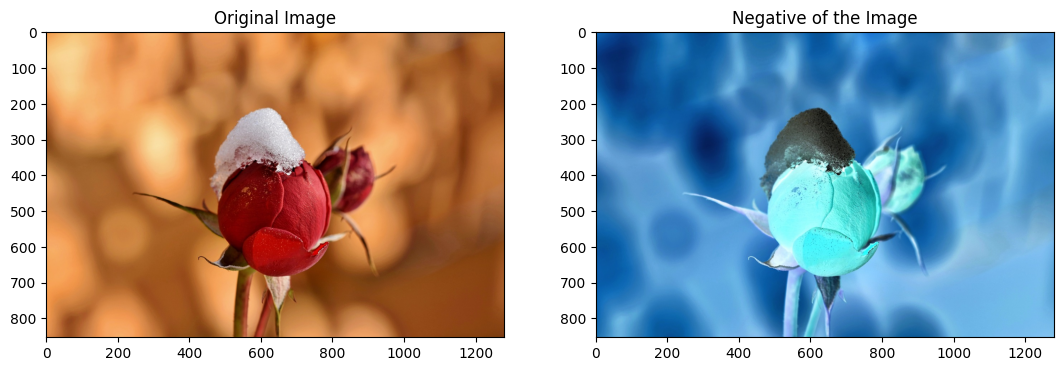

In [4]:
negativ_img = L - image_array
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(negativ_img)
plt.title("Negative of the Image")
plt.show()

# Log Transformation of the Image

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_7968\537787597.py:2: RuntimeWarning: divide by zero encountered in log
  log_trans_image = c * np.log(1 + image_array)
C:\Users\Ahmad\AppData\Local\Temp\ipykernel_7968\537787597.py:3: RuntimeWarning: invalid value encountered in cast
  log_trans_image = log_trans_image.astype(np.uint8)


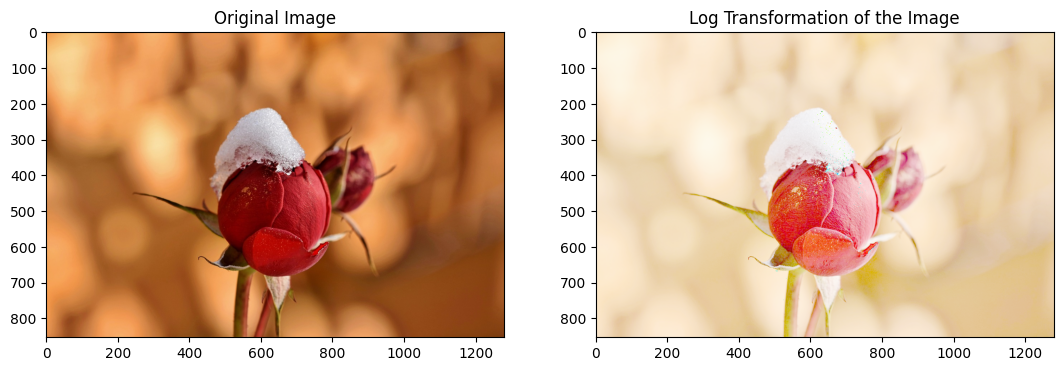

In [5]:
c = (L) / np.log(L + 1)
log_trans_image = c * np.log(1 + image_array)
log_trans_image = log_trans_image.astype(np.uint8)

plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(log_trans_image)
plt.title("Log Transformation of the Image")
plt.show()

# Power LAW Transformation of the Image

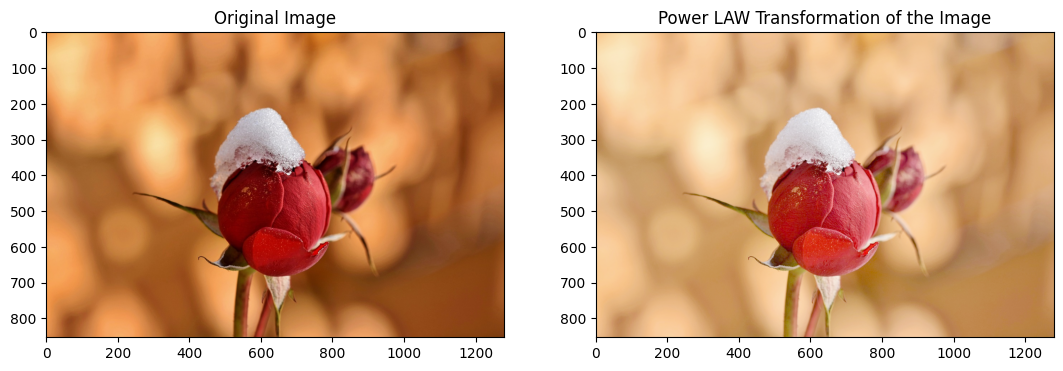

In [6]:
gamma = 0.5
s = L * ((image_array / L) ** gamma)

# s = np.clip(s, 0, L)
s = s.astype(np.uint8)

plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(s)
plt.title("Power LAW Transformation of the Image")
plt.show()

# Image Contrast Stretching 

In [7]:
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


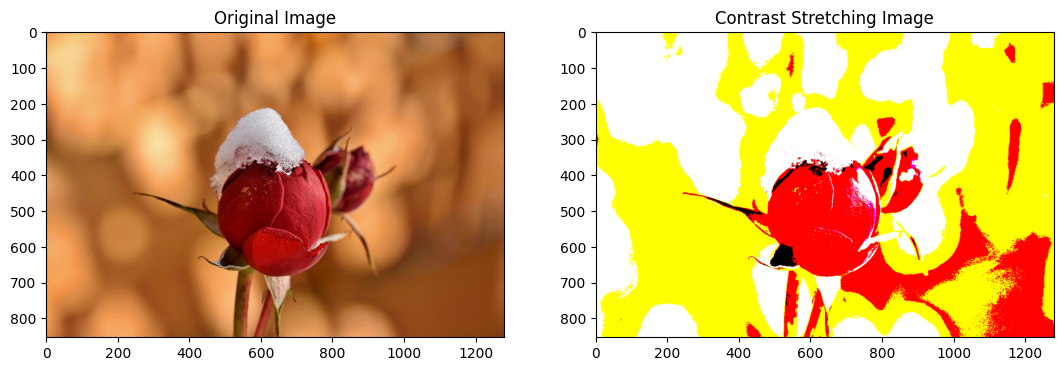

In [8]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
	if (0 <= pix and pix <= r1): 
		return (s1 / r1)*pix 
	elif (r1 < pix and pix <= r2): 
		return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
	else: 
		return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

# Define parameters. 
r1 = 70
s1 = 0
r2 = np.max(image_array)
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 

# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 

# Save edited image. 
plt.figure(figsize=(13, 8))
plt.subplot(1,2,1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(contrast_stretched, cmap='gray') 
plt.title("Contrast Stretching Image")
plt.show()
